In [41]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Lets start oour project with Mounting the data to drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/AlmaBetterCapstoneProjects/Speech Emotion Recognition/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [44]:
len(paths)

2800

In [45]:
paths[:5]

['/content/drive/MyDrive/AlmaBetterCapstoneProjects/Speech Emotion Recognition/TESS Toronto emotional speech set data/YAF_sad/YAF_base_sad.wav',
 '/content/drive/MyDrive/AlmaBetterCapstoneProjects/Speech Emotion Recognition/TESS Toronto emotional speech set data/YAF_sad/YAF_boat_sad.wav',
 '/content/drive/MyDrive/AlmaBetterCapstoneProjects/Speech Emotion Recognition/TESS Toronto emotional speech set data/YAF_sad/YAF_bath_sad.wav',
 '/content/drive/MyDrive/AlmaBetterCapstoneProjects/Speech Emotion Recognition/TESS Toronto emotional speech set data/YAF_sad/YAF_calm_sad.wav',
 '/content/drive/MyDrive/AlmaBetterCapstoneProjects/Speech Emotion Recognition/TESS Toronto emotional speech set data/YAF_sad/YAF_beg_sad.wav']

In [46]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [47]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/AlmaBetterCapstoneProje...,sad
1,/content/drive/MyDrive/AlmaBetterCapstoneProje...,sad
2,/content/drive/MyDrive/AlmaBetterCapstoneProje...,sad
3,/content/drive/MyDrive/AlmaBetterCapstoneProje...,sad
4,/content/drive/MyDrive/AlmaBetterCapstoneProje...,sad


In [48]:
df['label'].value_counts()

sad        600
fear       400
ps         400
neutral    400
disgust    400
angry      400
happy      200
Name: label, dtype: int64

Exploratory Data Analysis

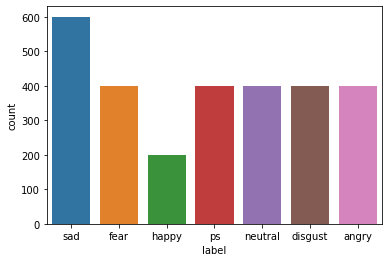

In [49]:
sns.countplot(df['label'])

In [50]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

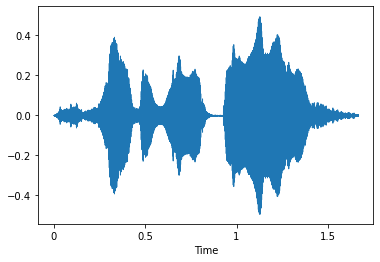

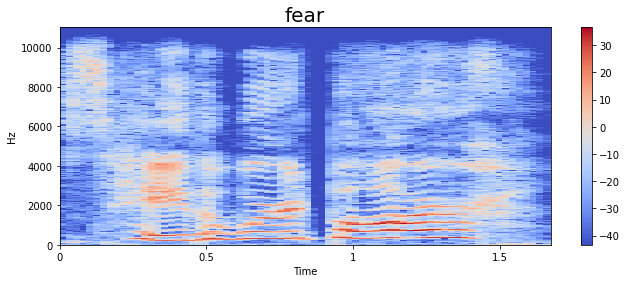

In [51]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

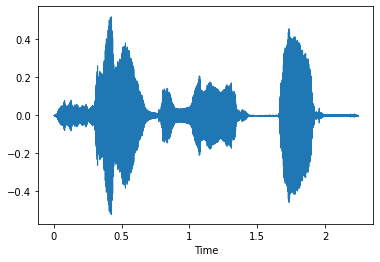

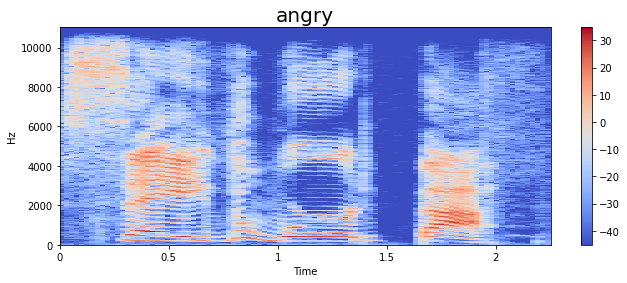

In [52]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

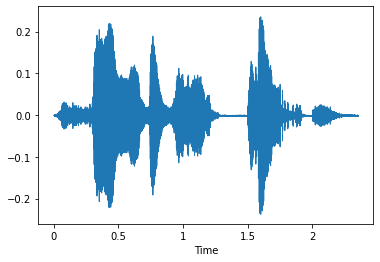

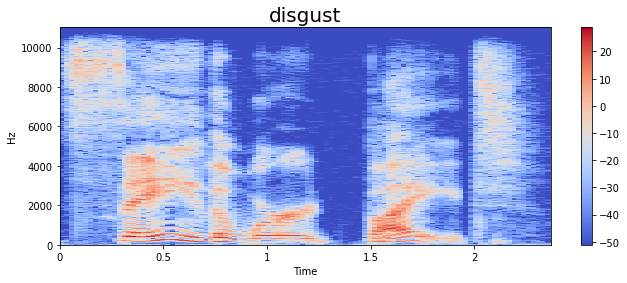

In [53]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

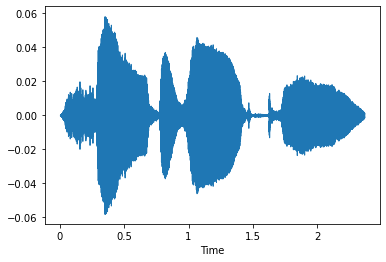

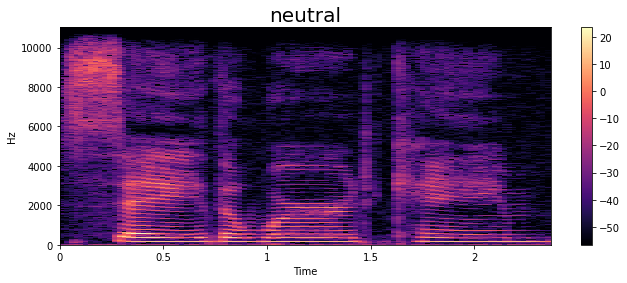

In [54]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

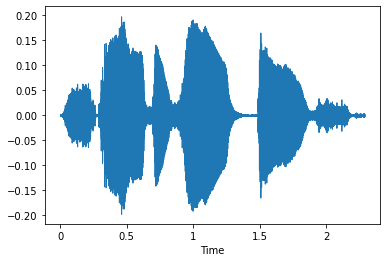

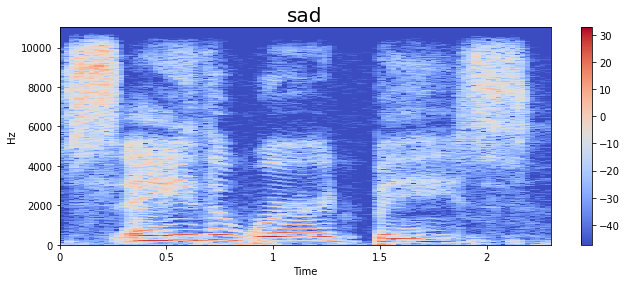

In [55]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

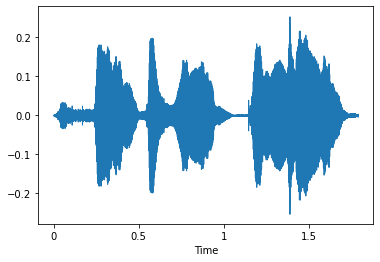

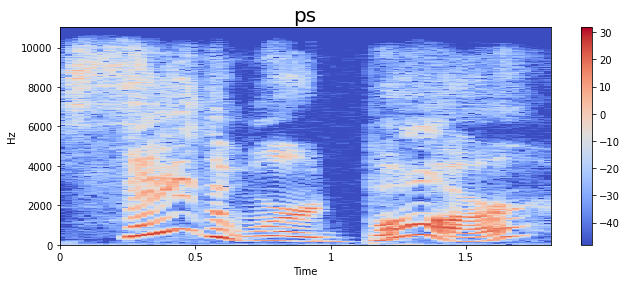

In [56]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

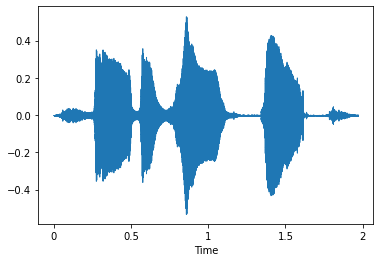

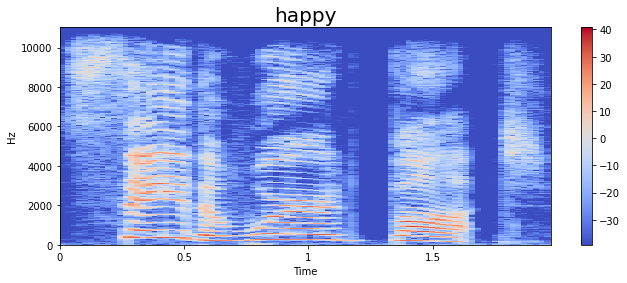

In [57]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [58]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [59]:
extract_mfcc(df['speech'][0])

array([-4.1425699e+02,  6.7552681e+01,  3.4559517e+01,  4.0159466e+01,
        1.2457261e+00,  9.5812778e+00, -3.2020411e+00, -7.8306990e+00,
       -2.8998654e+00, -5.3708749e+00, -9.7107048e+00,  6.0567708e+00,
       -1.3264745e+01,  9.7394762e+00, -1.0679389e+01,  1.5866574e+00,
       -1.5107492e+00, -1.5614951e+00, -1.2354962e+01, -2.7966418e+00,
       -1.1624480e+01, -5.3399129e+00, -8.2842770e+00,  9.4046813e-01,
       -3.3972361e+00,  8.7766123e+00, -1.0321910e+00,  5.8102196e-01,
        3.0456642e-03,  2.2276819e+00,  5.4270287e+00,  1.6310270e+01,
        6.7743330e+00,  8.1917419e+00, -1.5996408e+00,  3.6079543e+00,
        2.9599001e+00,  7.5064077e+00,  5.7285829e+00,  3.9914975e+00],
      dtype=float32)

In [60]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [61]:
X_mfcc

0       [-414.257, 67.55268, 34.559517, 40.159466, 1.2...
1       [-427.8859, 93.42522, 12.596934, 27.557384, -7...
2       [-395.28787, 89.47408, 7.703965, 32.352707, -2...
3       [-496.50488, 107.69919, 27.430267, 23.350302, ...
4       [-413.71442, 97.66905, 23.015476, 43.124084, 2...
                              ...                        
2795    [-435.01733, 89.65392, 23.535059, 10.627558, 2...
2796    [-428.05902, 99.2929, 9.079552, 9.16229, 16.35...
2797    [-500.03735, 123.271576, 28.468262, -12.761049...
2798    [-493.40555, 86.61596, 16.889126, 8.47983, 15....
2799    [-432.25867, 116.311104, 22.54801, 1.7259825, ...
Name: speech, Length: 2800, dtype: object

In [62]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [63]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [64]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [65]:
y = y.toarray()
y.shape

(2800, 7)

In [66]:
X_mlp=[x for x in X_mfcc]
X_mlp=np.array(X_mlp)

In [67]:
#train-test splitting
import sklearn
from sklearn.model_selection import train_test_split
x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y, test_size=0.2, random_state=0)
x_train_mlp.shape, y_train_mlp.shape, x_test_mlp.shape, y_test_mlp.shape

((2240, 40), (2240, 7), (560, 40), (560, 7))

In [68]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train_mlp,y_train_mlp)

MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [69]:
print("Training set score: {:.3f}".format(clf2.score(x_train_mlp, y_train_mlp)))
print("Test set score: {:.3f}".format(clf2.score(x_test_mlp, y_test_mlp)))

Training set score: 1.000
Test set score: 0.998


**Using MLP Classifier he gave good accuracy in training dataset and also test set, let us just check the LSTM model and then compare the results**

Create LSTM model

In [70]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [71]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 6s 143ms/step - loss: 1.0303 - accuracy: 0.6375 - val_loss: 1.1677 - val_accuracy: 0.5482
Epoch 2/50
35/35 [==============================] - 4s 127ms/step - loss: 0.2486 - accuracy: 0.9250 - val_loss: 1.4324 - val_accuracy: 0.6857
Epoch 3/50
35/35 [==============================] - 5s 134ms/step - loss: 0.1287 - accuracy: 0.9621 - val_loss: 1.1579 - val_accuracy: 0.7786
Epoch 4/50
35/35 [==============================] - 5s 130ms/step - loss: 0.0912 - accuracy: 0.9763 - val_loss: 1.3995 - val_accuracy: 0.7411
Epoch 5/50
35/35 [==============================] - 4s 124ms/step - loss: 0.1138 - accuracy: 0.9670 - val_loss: 2.2980 - val_accuracy: 0.5893
Epoch 6/50
35/35 [==============================] - 4s 126ms/step - loss: 0.0799 - accuracy: 0.9799 - val_loss: 2.2178 - val_accuracy: 0.6518
Epoch 7/50
35/35 [==============================] - 4s 128ms/step - loss: 0.0601 - accuracy: 0.9879 - val_loss: 1.4115 - val_accuracy: 0.7696
Epoch 

Plot the results

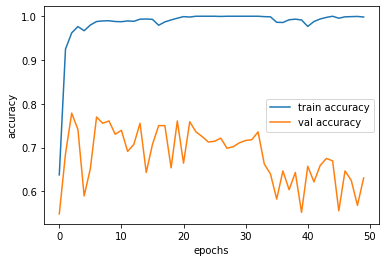

In [72]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

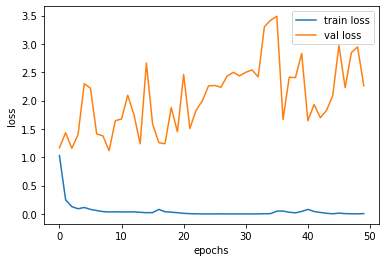

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [74]:
#train-test splitting
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2240, 40, 1), (2240, 7), (560, 40, 1), (560, 7))

In [75]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = enc.inverse_transform(pred_test)

y_test = enc.inverse_transform(y_test)

In [76]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.tail(100)

,Predicted Labels,Actual Labels
460,sad,sad
461,disgust,disgust
462,happy,happy
463,fear,fear
464,angry,angry
...,...,...
555,neutral,neutral
556,disgust,disgust
557,sad,sad
558,sad,sad


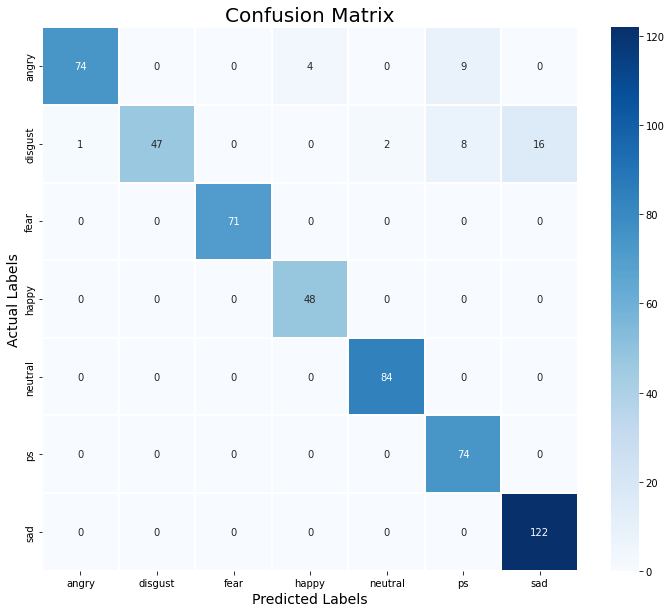

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in enc.categories_] , columns = [i for i in enc.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [78]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.99      0.85      0.91        87
     disgust       1.00      0.64      0.78        74
        fear       1.00      1.00      1.00        71
       happy       0.92      1.00      0.96        48
     neutral       0.98      1.00      0.99        84
          ps       0.81      1.00      0.90        74
         sad       0.88      1.00      0.94       122

    accuracy                           0.93       560
   macro avg       0.94      0.93      0.92       560
weighted avg       0.94      0.93      0.92       560



We can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc..
We overall achieved 93% accuracy on our test data and it is very good.

**Saving the model and the model chosen for deployment is LSTM**

In [79]:
model_name = 'model3.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/model3.h5 


In [80]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [81]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/saved_models/model3.h5")
print("Loaded model from disk")

Loaded model from disk
